**Experiment 5**
- Name : Abhay Dandge
- Sc No: 24215011117
- Design a simple neural network with a Batch Normalization layer in the hidden layers, and another without Batch Normalization in the hidden layers. Then, plot a contour plot to visualize the loss landscape during training

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset

# Generating a toy dataset
X, y = make_moons(n_samples=1000, noise=0.2)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert to torch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# Create DataLoader for easy batching
dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Model with Batch Normalization
class NNWithBatchNorm(nn.Module):
    def __init__(self):
        super(NNWithBatchNorm, self).__init__()
        self.layer1 = nn.Linear(2, 64)
        self.bn1 = nn.BatchNorm1d(64)
        self.layer2 = nn.Linear(64, 32)
        self.bn2 = nn.BatchNorm1d(32)
        self.layer3 = nn.Linear(32, 2)

    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))
        x = torch.relu(self.bn2(self.layer2(x)))
        x = self.layer3(x)
        return x

# Model without Batch Normalization
class NNWithoutBatchNorm(nn.Module):
    def __init__(self):
        super(NNWithoutBatchNorm, self).__init__()
        self.layer1 = nn.Linear(2, 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 2)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.layer3(x)
        return x


In [ ]:
def train_model(model, dataloader, learning_rate=0.01, epochs=10):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    losses = []
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in dataloader:
            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        losses.append(running_loss / len(dataloader))

    return losses


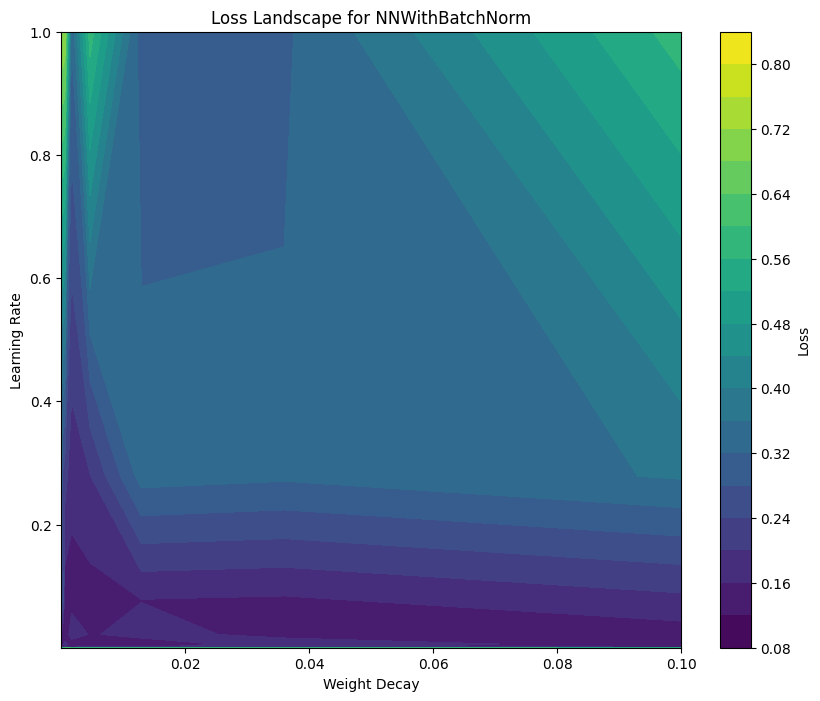

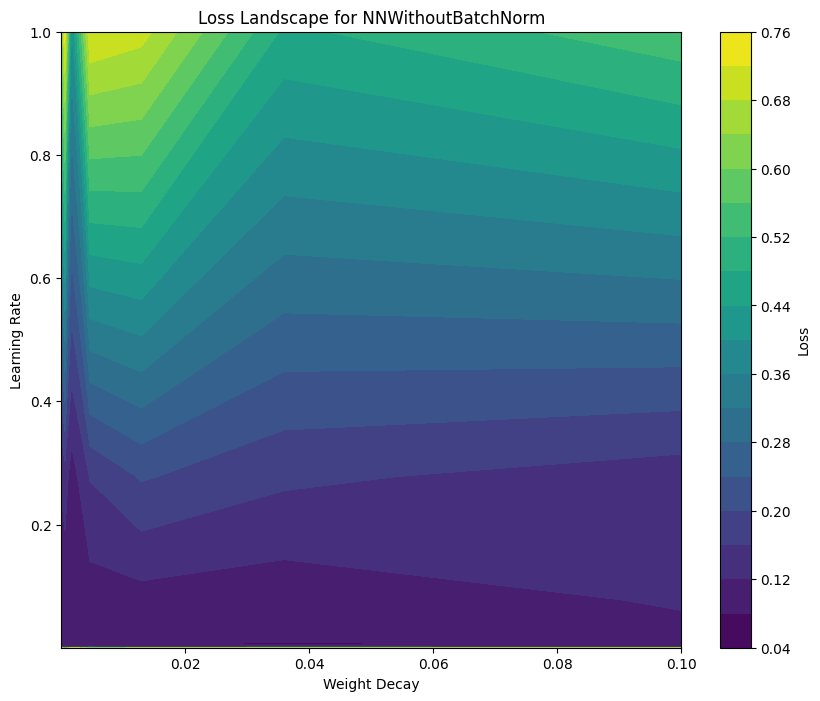

In [ ]:
def plot_loss_landscape(model_class, param_grid, dataloader, epochs=10):
    learning_rates = param_grid['learning_rate']
    weight_decays = param_grid['weight_decay']

    loss_matrix = np.zeros((len(learning_rates), len(weight_decays)))

    for i, lr in enumerate(learning_rates):
        for j, wd in enumerate(weight_decays):
            model = model_class()
            optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=wd)
            losses = train_model(model, dataloader, learning_rate=lr, epochs=epochs)
            loss_matrix[i, j] = losses[-1]  # Last epoch loss

    # Plotting the contour plot
    plt.figure(figsize=(10, 8))
    X, Y = np.meshgrid(weight_decays, learning_rates)
    plt.contourf(X, Y, loss_matrix, levels=20, cmap='viridis')
    plt.colorbar(label="Loss")
    plt.xlabel('Weight Decay')
    plt.ylabel('Learning Rate')
    plt.title('Loss Landscape for ' + model_class.__name__)
    plt.show()

# Define a parameter grid for the hyperparameters
param_grid = {
    'learning_rate': np.logspace(-5, 0, 10),  # Learning rate from 1e-5 to 1
    'weight_decay': np.logspace(-5, -1, 10)  # Regularization from 1e-5 to 1e-1
}

# Visualize the loss landscape for both models
plot_loss_landscape(NNWithBatchNorm, param_grid, dataloader)
plot_loss_landscape(NNWithoutBatchNorm, param_grid, dataloader)
